# The limits of LDA

Here, we will explore the limitations of LDA and how some of them can be overcome. To this end, two datasets will be used


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

## Preprocess the features
Sometimes, some of the features clearly violate the __linear separability__ assumption made by LDA. Features can be pre-processed by applying a given function to each feature, which yields a Generalized Linear Discriminant analysis:

$$ y = \sum_i^D w_i f_i(\mathbf{x}_i) $$ 

__Task:__ Follow the steps (1) to (4) in the code below.

cov_test 
 [[  2.72423032   9.69845172]
 [  9.69845172  56.61926086]]
cov 
 [[  2.69933697   9.8277591 ]
 [  9.8277591   53.76619022]]
Accuracy:  0.62


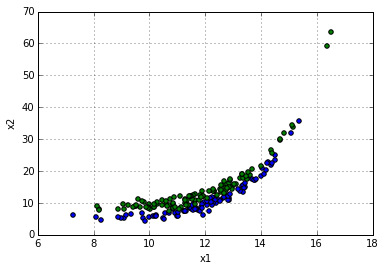

In [2]:
%matplotlib inline

ds_data = 'data/non-lin_train.data'
ds_labels ='data/non-lin_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

n_samples = len(y)


# 1-> Scatter-plot your 2D-data

#arange generiert Array mit n_samples einträgen, ansteigend von 0, 1, 2, ... also hier einen Index
idx_all = np.arange(n_samples)

np.random.shuffle(idx_all) #index Liste wird geschüttelt

# index aufteilen in training und validation data
idx_tr = idx_all[:int(0.7*n_samples)]
idx_val = idx_all[int(0.7*n_samples):]

# index mit Verteilung auf Daten anwenden
X_tr = X[idx_tr,:]    # vermischte X Daten, Teil 0-70%
y_tr = y[idx_tr]

X_va = X[idx_val,:]
y_va = y[idx_val]

# create index of class 1
idx_c1 = np.where(y_tr == 0)
idx_c2 = np.where(y_tr == 1)

plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()


#plt.scatter(X_train[:,0],X_train[:,1])

# classify un-processed data LDA() initialises classifier
clf = LinearDiscriminantAnalysis(store_covariance=True)
#clf = LDA(store_covariance=True)
#print(clf)

cov_test=np.cov(X_tr.T)
print("cov_test \n", cov_test)

clf.fit(X_tr, y_tr)  #train
score = clf.score(X_va, y_va)
#print("X_va /n", X_va)
#print("y_va /n", y_va)

cov = clf.covariance_
#print("X_va after /n", X_va)
#print("y_va after /n", y_va)

print("cov \n", cov)
print('Accuracy:  %.2f'%score)


#### Q2.4.1) Which LDA assumption(s) are violated by the provided dataset?
#### Q2.4.2) In which way can the feature(s) be preprocessed in order to improve the performance? Implement your solution and upload your results and code to the wiki and Git repository(under wiki/Results Assignment 2/Q 2.4.2 and git_dir/Assignment2/Q2-4.ipynb), together with a short explanation of your approach. Hint: Think of polynomials, trigonometric functions, logarithms, exponential functions, etc.

cov_test 
 [[ 2.71551491  0.28201462]
 [ 0.28201462  0.03798286]]
Accuracy:  0.84
cov 
 [[ 2.70257845  0.28054484]
 [ 0.28054484  0.0348424 ]]
The hand made Accuracy on the test set is 84.44%


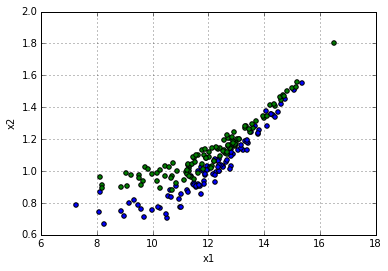

In [103]:
#ds_data = 'data/non-lin_test.data'
#X_test = np.loadtxt(ds_data)

# 2-> Preprocess your features
# take log of y value
X_tr_prep = np.zeros_like(X_tr)
X_tr_prep[:,0] = X_tr[:,0]
X_tr_prep[:,1] = np.log10(X_tr[:,1])

#X_tr_prep = np.array([X_tr[:,0], np.log(X_tr[:,1])])
#print("X_tr_prep", X_tr_prep.shape)
#print("X_tr", X_tr.shape)


plt.figure()
#plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='b')
#plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')

plt.scatter(X_tr_prep[idx_c1,0],X_tr_prep[idx_c1,1],c='b')
plt.scatter(X_tr_prep[idx_c2,0],X_tr_prep[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

# 3-> Check the performance of your LDA classifier
clf = LinearDiscriminantAnalysis(store_covariance=True)
#clf = LDA(store_covariance=True)
#print(clf)

cov_test=np.cov(X_tr_prep.T)
print("cov_test \n", cov_test)

clf.fit(X_tr_prep, y_tr)  #train

X_va_prep = np.zeros_like(X_va)
X_va_prep[:,0] = X_va[:,0]
X_va_prep[:,1] = np.log10(X_va[:,1])

score = clf.score(X_va_prep, y_va)
print('Accuracy:  %.2f'%score)
#print("X_va /n", X_va)
#print("y_va /n", y_va)

cov = clf.covariance_
#print("X_va after /n", X_va)
#print("y_va after /n", y_va)

y_va_predict = clf.predict(X_va_prep)

print("cov \n", cov)

# sum (a=b) / len
accuracy = float(sum(np.array(y_va, dtype=int)==np.array(y_va_predict, dtype=int)))/len(y_va)*100
print('The hand made Accuracy on the test set is %.2f%%' %(accuracy))

# 4-> If you think you got it, upload your prediction accuracy to the wiki.
# 5 -> In addition, upload your implementation to GitLab under git_dir/Assignment2/Q2-4.ipynb

## Feature extraction
__Tasks:__ 
 1. Visualize the given toy 2D-dataset. 
 2. Train an LDA classifier on the given data. Remember to split your data set into training and validation set. Which performance do you achieve?


There appears to be some exploitable structure in your data, but the LDA is not able to directly capture this.

#### Q2.4.3) In which way can the existing features be combined in order to get a __linearly separable__ dataset? 

__Hint:__ Try to think of it in a 3D way: How would you add another dimension such that the 2 classes can be separated by a plane?

__Tasks__: 
1. Implement your additional feature that combines the existing features. 
2. Calculate the performance of LDA using this additional feature and see if you can improve upon the performance.

Accuracy:  0.40
x shape (300, 2)
x rad shape (300, 1)
X.shape before (300, 2)
X.shape after append (300, 3)
Accuracy with radiant feature:  0.98


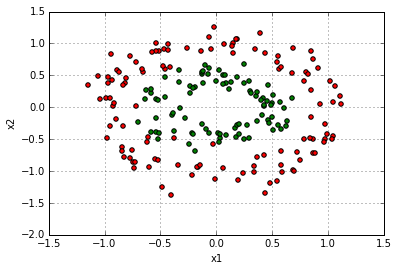

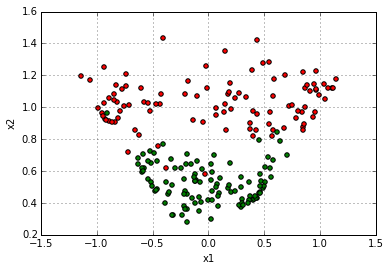

In [104]:
ds_data = 'data/circles_train.data'
ds_labels ='data/circles_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

n_samples = len(y)

# 1-> Scatter-plot your 2D-data.

idx_all = np.arange(n_samples)

np.random.shuffle(idx_all) #index Liste wird geschüttelt

# index aufteilen in training und validation data
idx_tr = idx_all[:int(0.7*n_samples)]
idx_val = idx_all[int(0.7*n_samples):]

# index mit Verteilung auf Daten anwenden
X_tr = X[idx_tr,:]    # vermischte X Daten, Teil 0-70%
y_tr = y[idx_tr]

X_va = X[idx_val,:]
y_va = y[idx_val]

# create index of class 1
idx_c1 = np.where(y_tr == 0)
idx_c2 = np.where(y_tr == 1)

plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='r')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

clf = LinearDiscriminantAnalysis(store_covariance=True)
clf.fit(X_tr, y_tr)  #train
score = clf.score(X_va, y_va)
print('Accuracy:  %.2f'%score)

# 2-> Combine the 2 existing features so a LDA classifier works

# radius from center of data
print("x shape", X.shape)
X_rad = np.zeros(len(X))
X_rad = np.atleast_2d(np.sqrt(np.square(X[:,0])+np.square(X[:,1]))).T
print("x rad shape", X_rad.shape)

print ("X.shape before", X.shape)
# enhance X by further feature
X = np.append(X,X_rad, axis=1)
print ("X.shape after append", X.shape)
idx_all = np.arange(n_samples)

np.random.shuffle(idx_all) #index Liste wird geschüttelt

# index aufteilen in training und validation data
idx_tr = idx_all[:int(0.7*n_samples)]
idx_val = idx_all[int(0.7*n_samples):]

# index mit Verteilung auf Daten anwenden neu
gaga = X[idx_tr,:]
X_tr = X[idx_tr,:]    # vermischte X Daten, Teil 0-70%
y_tr = y[idx_tr]

X_va = X[idx_val,:]
y_va = y[idx_val]

# create index of class 1
idx_c1 = np.where(y_tr == 0)
idx_c2 = np.where(y_tr == 1)

plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,2],c='r')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,2],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

clf = LinearDiscriminantAnalysis(store_covariance=True)
clf.fit(X_tr, y_tr)  #train
score = clf.score(X_va, y_va)
print('Accuracy with radiant feature:  %.2f'%score)

## What else can go wrong?

__Task:__ Visualize the data set.

#### Q2.4.4) What LDA assumption(s) are violated by the next dataset?. What would be an optimal decision boundary? 

#### Q2.4.5 (Bonus): Investigate which method would provide an optimal decision boundary. 

__Hint:__ It is slightly a more general technique than LDA.

Accuracy:  0.97


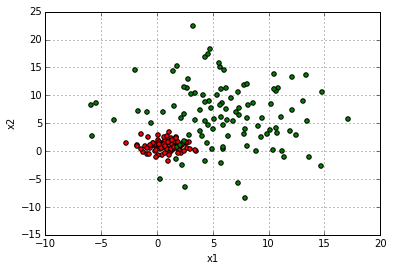

In [107]:

ds_data = 'data/unbalanced_train.data'
ds_labels ='data/unbalanced_train.labels'
X = np.loadtxt(ds_data)
y = np.loadtxt(ds_labels)

n_samples = len(y)

# 1-> Scatter-plot your 2D-data.

idx_all = np.arange(n_samples)

np.random.shuffle(idx_all) #index Liste wird geschüttelt

# index aufteilen in training und validation data
idx_tr = idx_all[:int(0.7*n_samples)]
idx_val = idx_all[int(0.7*n_samples):]

# index mit Verteilung auf Daten anwenden
X_tr = X[idx_tr,:]    # vermischte X Daten, Teil 0-70%
y_tr = y[idx_tr]

X_va = X[idx_val,:]
y_va = y[idx_val]

# create index of class 1
idx_c1 = np.where(y_tr == 0)
idx_c2 = np.where(y_tr == 1)

plt.figure()
plt.scatter(X_tr[idx_c1,0],X_tr[idx_c1,1],c='r')
plt.scatter(X_tr[idx_c2,0],X_tr[idx_c2,1],c='g')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

clf = QuadraticDiscriminantAnalysis(store_covariances=False)
clf.fit(X_tr, y_tr)  #train
score = clf.score(X_va, y_va)
print('Accuracy:  %.2f'%score)

# 1-> Scatter-plot your 2D-data.
# 2-> What is the optimal decision boundary?